### AM558
### observation.50624.1409722
### 25 June 1997

#### Notes <br>

<div class="alert alert-block alert-info"
<b>Info:<b> I am unable to get a zoomed-in image of TERZAN 1, AM558. <br>
I need to work on that.<br>
I tried to get a zoomed-in image. The code is in the third cell.<br>
the listobs for this observations says that they used epoch1950

</div>

In [6]:
import numpy as np
from astropy.io import fits, ascii
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmasher as cms

from regions import EllipseSkyRegion, RectangleSkyRegion

from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

Set OBSGEO-B to    34.078813 from OBSGEO-[XYZ].
Set OBSGEO-H to     2111.883 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


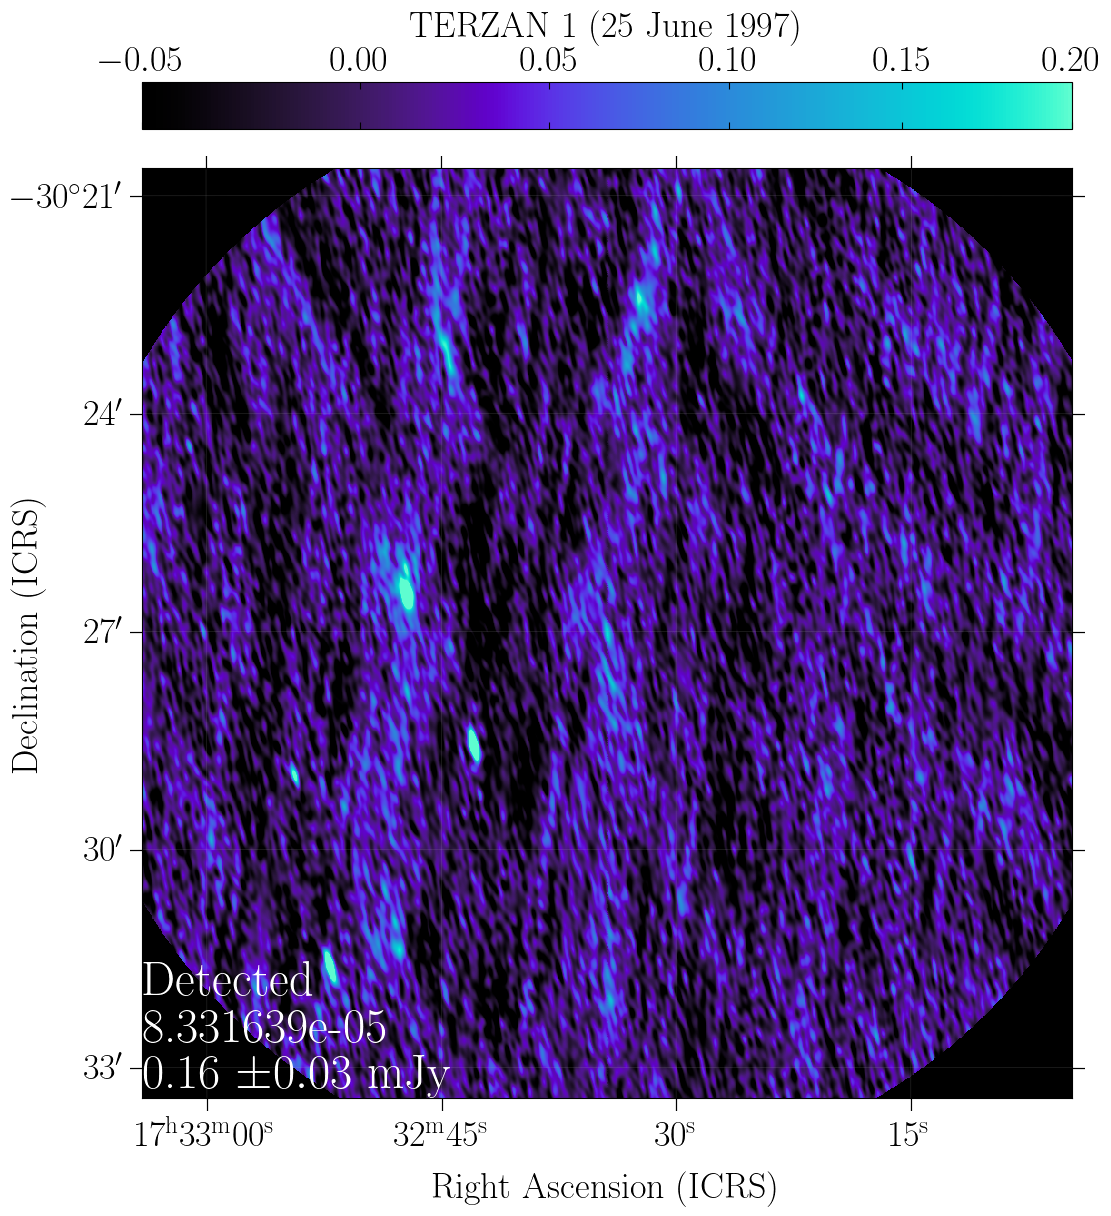

In [17]:
fig = plt.figure(figsize=(12,11)) 
label_fsize = 26
# center = SkyCoord('17h35m47.260000s', '-30d28m54s', frame='icrs') #  17:32:34.420000 -30.27.01.30000
center = SkyCoord('17h32m34.42s', '-30d27m01.3s', frame='fk4')
# j2000 coordinates: 17 35 47.26 -30 28 54.0
box_bkg = [150*u.arcmin,150*u.arcmin]
box_contour1 = [0.6*u.arcmin,0.6*3.5/3*u.arcmin] 

# Defining fluxes
# flux = '0.16$\pm 0.03$'
flux =  '0.16 $\pm 0.03$ mJy'
rms = '8.331639e-05'
detected = 'Detected'

bkg_fname = 'TERZAN1.am558.fits'
bkg_im  =  fits.open(bkg_fname)
bkg_data = bkg_im[0].data[0][0]*1e3
bkg_wcs = WCS(bkg_im[0].header, naxis=2)
bkg_cut = Cutout2D(bkg_data, center, box_bkg, wcs=bkg_wcs)

ax = plt.subplot2grid([1, 1], [0, 0], fig=fig, projection=bkg_cut.wcs)

cmap = cms.cosmic
cmap.set_bad('black')
cmap_norm = colors.PowerNorm(0.9, vmin=-0.05, vmax=0.2)

ax_bkimg = ax.imshow(bkg_cut.data,
                     cmap = cmap,
                     norm = cmap_norm,
                     aspect = 'equal',
                     origin = 'lower', 
                     interpolation = 'none',
                     rasterized = True, transform=ax.get_transform(bkg_cut.wcs))

cbar = fig.colorbar(ax_bkimg, ax=ax,shrink=1., orientation='horizontal', pad=-1.2)
cbar.ax.set_title('TERZAN 1 (25 June 1997)',fontsize=label_fsize,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize)

meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(0*u.arcsec,0*u.arcsec),
                                bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
meerkat_beam_pix_reg.visual['color'] = 'w'
meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
meerkat_beam_pix_reg.visual['fill'] = True

meerkat_beam_pix_reg.visual['linewidth'] = 2.0
meerkat_beam_pix_reg.plot(ax=ax)

ax.grid(linewidth=0.5,alpha=0.2)
ax.tick_params(axis='both', which='major', length=9)
ax.set_ylabel(r"Declination (ICRS)", size=label_fsize,labelpad=-0.5)
ax.set_xlabel(r"Right Ascension (ICRS)", size=label_fsize,ha='center')
ax.tick_params(labelsize=label_fsize)
# ax.text(1, 1, str(flux)+' mJy',fontsize=35,color='w',verticalalignment='bottom')

ax.text(1, 1, str(flux),fontsize=35,color='w',verticalalignment='bottom')
ax.text(1, 75, str(rms),fontsize=35,color='w',verticalalignment='center')
ax.text(1, 150, str(detected),fontsize=35,color='w',verticalalignment='top')

plt.savefig('TERZAN1.observation.50624.1409722.png', bbox_inches = 'tight' )

## The code below is for the zoomed in image

##### For some reason this code does not print a zoomed in image of ter1. Also, the listobs for this observations says that they used fk4


Set OBSGEO-B to    34.078813 from OBSGEO-[XYZ].
Set OBSGEO-H to     2111.883 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Text(1, 1, '0.16$\\pm 0.03$ mJy')

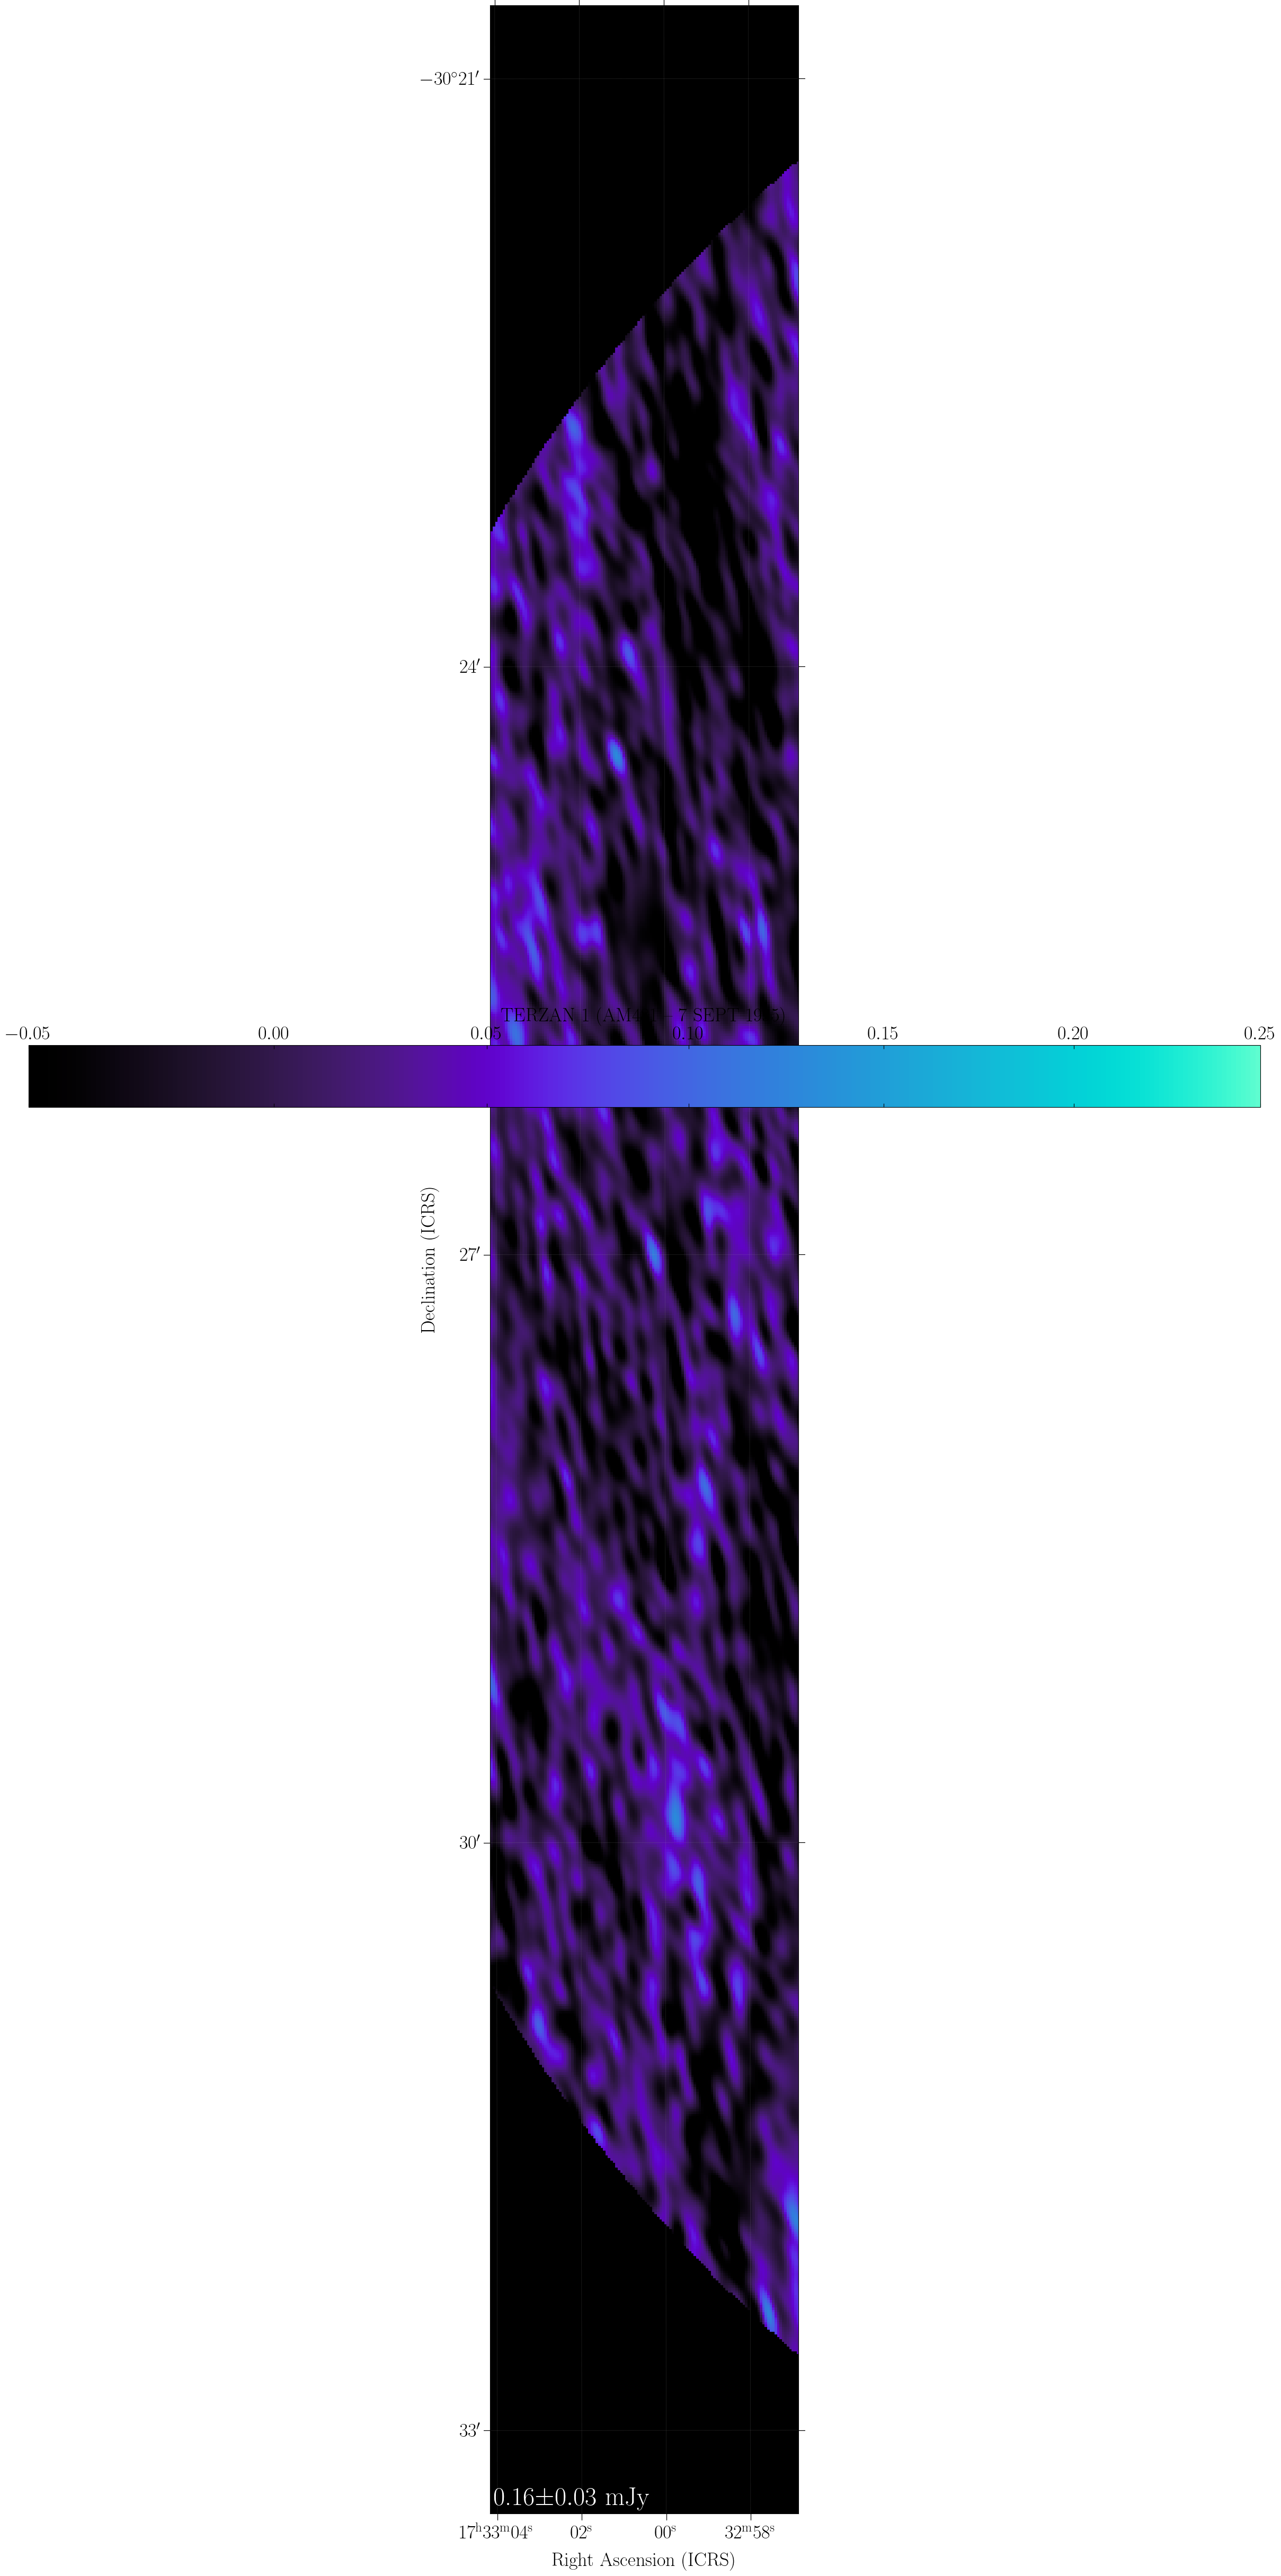

In [28]:
fig = plt.figure(figsize=(30,30)) 
label_fsize = 26
center = SkyCoord('17h32m34.420000s', '-30d27m01.30000s', frame='fk4') #  17:32:34.420000 -30.27.01.30000
box_bkg = [40*u.arcmin,40*u.arcmin]
box_contour1 = [25*u.arcmin, 25*u.arcmin] # [0.6*u.arcmin,0.6*3.5/3*u.arcmin]

# Defining fluxes
flux = '0.16$\pm 0.03$'

bkg_fname = 'TERZAN1.am558.fits'
bkg_im  =  fits.open(bkg_fname)
bkg_data = bkg_im[0].data[0][0]*1e3
bkg_wcs = WCS(bkg_im[0].header, naxis=2)
bkg_cut = Cutout2D(bkg_data, center, box_bkg, wcs=bkg_wcs)

ax = plt.subplot2grid([1, 1], [0, 0], fig=fig, projection=bkg_cut.wcs)

cmap = cms.cosmic
cmap.set_bad('black')
cmap_norm = colors.PowerNorm(0.9, vmin=-0.05, vmax=0.25)

ax_bkimg = ax.imshow(bkg_cut.data,
                     cmap = cmap,
                     norm = cmap_norm,
                     aspect = 'equal',
                     origin = 'lower', 
                     interpolation = 'none',
                     rasterized = True, transform=ax.get_transform(bkg_cut.wcs))

cbar = fig.colorbar(ax_bkimg, ax=ax,shrink=1., orientation='horizontal', pad=-1.2)
cbar.ax.set_title('TERZAN 1 (AM481 -- 7 SEPT 1995)',fontsize=label_fsize,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize)

meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-19*u.arcsec,-16*u.arcsec),
                                bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
meerkat_beam_pix_reg.visual['color'] = 'w'
meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
meerkat_beam_pix_reg.visual['fill'] = True

meerkat_beam_pix_reg.visual['linewidth'] = 2.0
meerkat_beam_pix_reg.plot(ax=ax)

ax.grid(linewidth=0.5,alpha=0.2)
ax.tick_params(axis='both', which='major', length=9)
ax.set_ylabel(r"Declination (ICRS)", size=label_fsize,labelpad=-0.5)
ax.set_xlabel(r"Right Ascension (ICRS)", size=label_fsize,ha='center')
ax.tick_params(labelsize=label_fsize)
ax.text(1, 1, str(flux)+' mJy',fontsize=35,color='w',verticalalignment='bottom')

# plt.savefig('TERZAN1.observation.50624.1409722.png', bbox_inches = 'tight' )